## Problem Set #4
## Discrete approximation of an AR(1) process
### Xi Chen

In [47]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy.linalg as LA

## Part (a) 

In [48]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [49]:
mu= 11.4
r = 0.85
z = np.zeros(500)

In [50]:
for i in range(500):
    if i == 0:
        z[i] = r*unif_vec[0] + (1-r)*mu + eps_vec[i]
    else:
        z[i] = r*z[i-1] + (1-r)*mu + eps_vec[i]

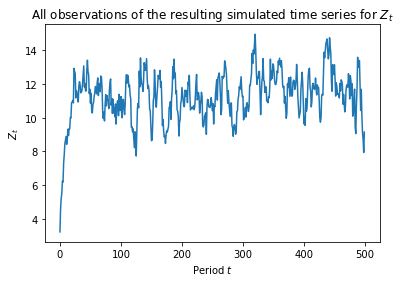

In [51]:
plt.plot(z)
plt.title("All observations of the resulting simulated time series for $Z_t$")
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.show()

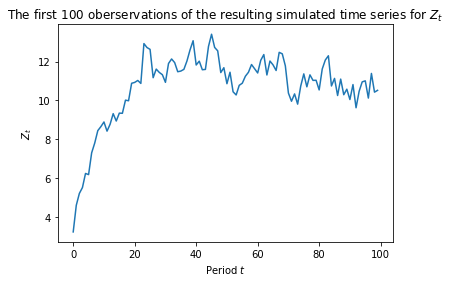

In [52]:
plt.plot(z[:100])
plt.title("The first 100 oberservations of the resulting simulated time series for $Z_t$")
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.show()

## Part (b) 

In [53]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)

In [54]:
z_vals[2]

11.4

In [55]:
print('z_vals is', z_vals)

z_vals is [  9.3   10.35  11.4   12.45  13.5 ]


## Part (c) 

In [56]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [57]:
print('z_cuts is', z_cuts)

z_cuts is [  9.825  10.875  11.925  12.975]


In [58]:
z_bins = np.digitize(z, z_cuts)

In [59]:
P_hat = np.zeros(shape=(5,5))

for i in range(0,5):
    for j in range(0,5):
        count = 0
        denom = 0
        for k in range(0,499):
            curr = z_bins[k]
            nxt = z_bins[k+1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                denom += 1
        P_hat[i][j] = count/denom

print("Markov transition matrix P is: \n", P_hat)

Markov transition matrix P is: 
 [[ 0.75757576  0.21212121  0.03030303  0.          0.        ]
 [ 0.1         0.50909091  0.34545455  0.04545455  0.        ]
 [ 0.03144654  0.22012579  0.48427673  0.2327044   0.03144654]
 [ 0.          0.04273504  0.34188034  0.5042735   0.11111111]
 [ 0.          0.          0.04255319  0.34042553  0.61702128]]


## Part (d) 

In [60]:
initial_vec = np.array([0, 0, 1, 0, 0]).reshape(5,1)
res = LA.matrix_power(P_hat.T, 3) @ initial_vec
print("The probablity is ", res[4])

The probablity is  [ 0.07752374]


## Part (e) 

In [61]:
eigvals, eigvecmat = LA.eig(P_hat.T)
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
print("The stationary (long-run, ergodic) distribution of Z is \n", stat_dist)

The stationary (long-run, ergodic) distribution of Z is 
 [ 0.13226453  0.22044088  0.31863727  0.23446894  0.09418838]


## Part (f) 

In [62]:
z0 = z_vals[2]
x_vec = np.zeros(T)
x_t = z0
xt_ind = 1

In [63]:
for t_ind in range(T):
    xtp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    x_t = x_tp1
    xt_ind = xtp1_ind

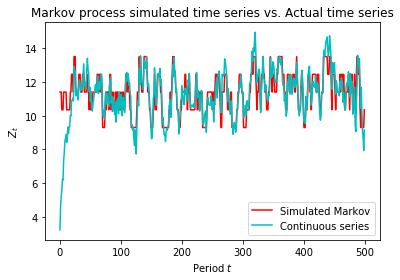

In [64]:
plt.plot(x_vec, color = 'r')
plt.plot(z, color = 'c')
plt.title('Markov process simulated time series vs. Actual time series')
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'Continuous series'])
plt.show()